El script de la Unidad_No.1_Regresion Lineal simple_teórica, cubrió desde los componentes de la Regresión Lineal, al método de MCO y los supuestos del modelo.
Pero dado que trabajamos con datos artificiales, la validación de los supuestos no supuso un reto más grande. En este este script, trabajaremos con una base de datos real, por lo que la validacón de supuestos implicará trabajar con la sección de: "posibles soluciones" del script anterior.

Manos a la obra!

### Conceptos previos

Para los conceptos previos y práctica inicial de Python en nuestro Jupyter Notebook, lo que primero vamos a realizar es importar la base de datos con la cuál vamos a trabajar esta unidad.

### Importar una base al Jupyter Notebook con pandas

La base con la que trabajaremos esta unidad es una base que contiene información acerca de 525 propiedades en una ciudad no especificada.
    Es una base que tiene un puntaje de 10/10 en usabilidad, lo que nos indica que es adecuada para el uso de estudiantes y principiantes dado que no tiene grandes problemas en sus datos.

![image-4.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/Regresi%C3%B3n%20Linear%20simple%20aplicada/house_dataset_kaggle.png)

Adicionalmente, es una base de datos que no contiene Notebooks parecidos al que desarrollaremos para la clase de hoy, por lo que lo hace interesante.

Para este ejercicio me he descargado la base de datos y he cargado la misma en la carpeta compartida con la que trabajaremos.

Para descargar la base de datos de este capítulo pueden dirigirse al siguiente link, descargar la base en formato csv de la carpeta zip o importarla directamente previo paso de obtención de una API de Kaggle.

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download&select=Housing.csv


Una vez descargada la base y situada en la carpeta donde se encuentra este Jupyter Notebook, lo primero que vamos a realizar es la importación de todos los módulos empleados en el script anterior: pandas, numpy, pyplot y seaborn.

### Importar los modules requeridos

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Para la regresión y validación de supuestos llamamos a statsmodel, a el módulo encargado de la notación de fórmula y al módulo para las pruebas de hipótesis.

In [5]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

Ahora sí, procedemos a llamar a nuestra base de datos a nuestro espacio en el Jupyer Notebook:

In [6]:
df=pd.read_csv("house_dataset.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Como podemos observar la base de datos contiene 545 observaciones de propiedades y un total de 13 columnas que representan los atributos o características de cada fila.


Dado que el análisis se realizará en español, se procede a recodificar los nombres de las columnas:

### Recodificar el nombre de las columnas a español

In [8]:
df.rename({'price':'precio', 'bedrooms': 'cuartos', 'bathrooms':'banios', 'stories': 'pisos', 'mainroad':'carretera',
          'guestroom':'cuarto_huespedes', 'basement': 'sotano', 'hotwaterheating':'calefaccion', 'airconditioning':'AC', 
           'parking':'parqueadero', 'prefarea':'periferia', 'furnishingstatus':'amoblado' })

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### ¿Qué pasó?

Lo intentamos nuevamente:

In [9]:
df.rename({'price':'precio', 'bedrooms': 'cuartos', 'bathrooms':'banios', 'stories': 'pisos', 'mainroad':'carretera',
          'guestroom':'cuarto_huespedes', 'basement': 'sotano', 'hotwaterheating':'calefaccion', 'airconditioning':'AC', 
           'parking':'parqueadero', 'prefarea':'periferia', 'furnishingstatus':'amoblado' }, axis=1, inplace=True)

In [10]:
df

,precio,area,cuartos,banios,pisos,carretera,cuarto_huespedes,sotano,calefaccion,AC,parqueadero,periferia,amoblado
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Perfecto. Ahora que tenemos identificadas los atributos en español, podemos comenzar con el análisis de la base de datos.

Lo primero que deberíamos realizar es un pequeño resumen de nuestra base de datos. Para ello podemos utilizar varios comandos en Python, pero el que con mayor frecuencia utilizaremos es el método .describe() el cual nos retorna 8 líneas de resumen, siendo las 3 primeras medidas de tendencia central, 2 correspondientes al dato numérico máximo y mínimo y 3 líneas que devuelven los valores en los cuartiles especificados.

In [12]:
df.describe()

,precio,area,cuartos,banios,pisos,parqueadero
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Del output, podemos ver que sólo las variables numéricas son desplegadas dado que por su naturaleza si pueden agregarse o interpretarse por medidas de tendencia central y demás.

#### Comentarios repecto a alguna variable?

### Datos perdidos

Exploremos en nuestra base si existen valores perdidos:

In [14]:
df.isna().sum()

precio              0
area                0
cuartos             0
banios              0
pisos               0
carretera           0
cuarto_huespedes    0
sotano              0
calefaccion         0
AC                  0
parqueadero         0
periferia           0
amoblado            0
dtype: int64


Recordemos que una regla básica para eliminar valores perdidos u observaciones que se encuentren erróneas es basándonos en:

- Siempre es mejor conservar los datos que descartarlos. Como regla general, se puede descartar variables si los datos faltantes corresponden a más del 60% de las observaciones, siempre teniendo en cuenta que la imputación es preferida sobre la eliminación de variables

Existen 3 categorías de datos perdidos:

   - Falta al azar (MAR): Cuando la propensión a que falte un punto de datos no está relacionado con los datos faltantes, pero sí con algunos de los datos observados.
   
   
   - Missing Completely at Random (MCAR): Cuando el missing value no tiene nada que ver con su valor hipotético y con los valores de otras variables
   
   
   - Missing not at Random (MNAR): Cuando los missing values dependen del valor hipotético (por ejemplo, las personas con salarios altos generalmente no quieren revelar sus ingresos en las encuestas) o cuando los missing values dependen del valor de alguna otra variable (por ejemplo, cuando en encuestas las mujeres no quieren revelar su edad. Aquí, el valor que falta en la variable de edad se ve afectado por la variable de género)


En los primeros dos casos, es seguro eliminar los datos con valores faltantes dependiendo de sus ocurrencias, mientras que en el tercer caso, eliminar las observaciones con valores faltantes puede producir un sesgo en el modelo. Así que tenemos que tener mucho cuidado antes de eliminar las observaciones.

In [15]:
df.describe(include = 'object')

,carretera,cuarto_huespedes,sotano,calefaccion,AC,periferia,amoblado
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


Comencemos con la forma más clásica de mostrar datos categóricos: un gráfico de barras

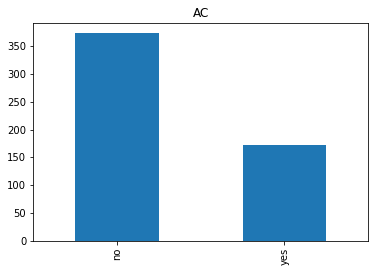

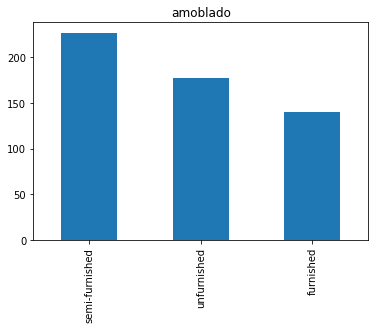

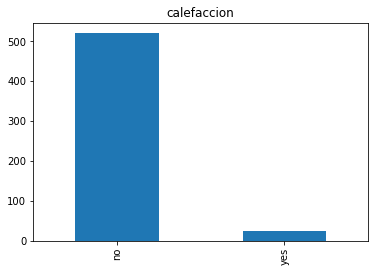

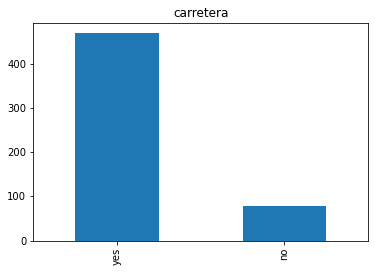

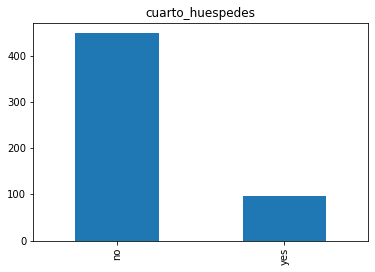

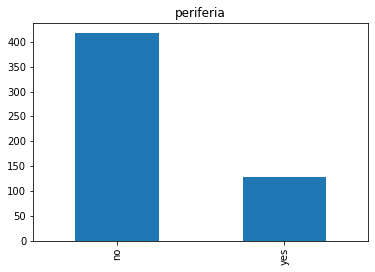

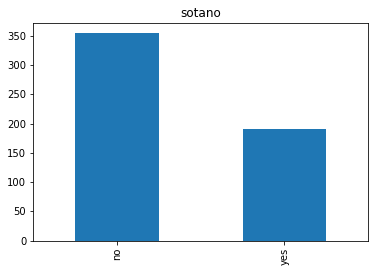

In [16]:
for i in df.select_dtypes(['object']).columns.difference(['modelo']):
    if df[i].dtype=='object':
        df[i].value_counts().plot(kind='bar', title=str(i))
        plt.show()


Excelente!, no existen registros en nuestras variables categóricas de observaciones imputadas como 0 o con alguna denominación que nos haga sospechar valores perdidos.

El siguiente paso en nuestro análisis es el análisis de correlaciones. Recordemos que con el ejemplo teórico fue sencillo dado que derivamos variables a partir de otra. El presente caso, es una base real por lo que es muy probable que las correlaciones sean menos intensas.

#### Correlaciones entre las variables

In [17]:
df.corr()

,precio,area,cuartos,banios,pisos,parqueadero
precio,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
cuartos,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
banios,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
pisos,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parqueadero,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [18]:
df.corr().style.background_gradient(cmap='coolwarm')

,precio,area,cuartos,banios,pisos,parqueadero
precio,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
cuartos,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
banios,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
pisos,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parqueadero,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


#### Interpretación

Para la interpretación de la matriz de correlaciones, que es una herramienta que cuantifica el grado de asociación lineal entre dos variables, escogeré la más alta positiva y la más alta negativa para que puedan replicar la interpretación con las demás variables.

En el caso de correlación positiva, el mayor valor se encuentra entre las variables: precio y area. Y su interpretación sería de la siguiente forma:

        "A medida que area incrementa, también lo hace el precio del inmueble"

Aunque no existen correlaciones negativas, de existir lo que nos indicarían es que si una variable disminuye la otra aumentaría y viceversa. En otras palabras, indica que las variables analizadas se mueven en direcciones opuestas.

A seguir, procederemos a visualizar las variables en pares por medio de la función de seaborn pairplot. En general, la visualización de las variables es un paso importante antes de la aplicación de la herramienta de regresión.

In [13]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

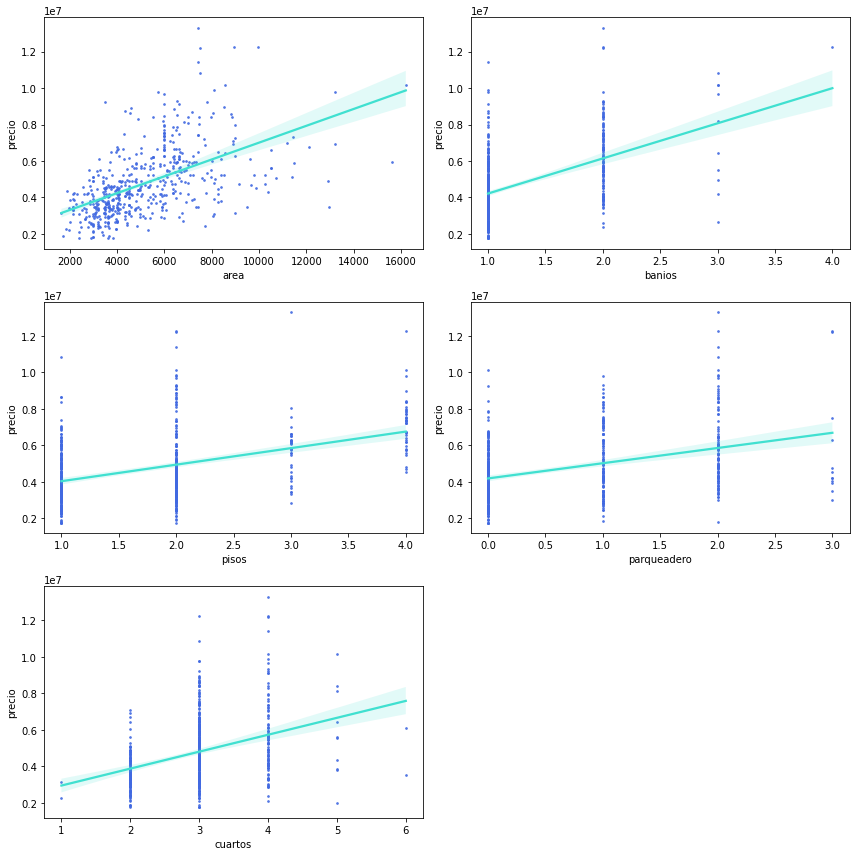

In [14]:
# Número de las variables
n = 6
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df.corr()
#
cols = corr.nlargest(6, "precio")["precio"].index
# Calculate correlation
for i in np.arange(1,6):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['precio'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

Del pairplot, se puede observar que nuestra variable "Y" tiene algunos valores muy altos que podrían ser outliers, por lo que se procede a verificar si la variable objetivo tiene una distribución aproximadamente normal. Para ello tenemos dos opciones gráficas:
- el Q-Q plot del script anterior
- y un gráfico de dspersión dentro del module seaborn

Como aplicamos el Q-Q plot en el script anterior, corramos esta vez un displot a nuestra variable objetivo

<AxesSubplot:xlabel='precio', ylabel='Density'>

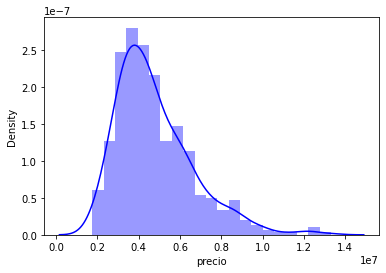

In [15]:
sns.distplot(df['precio'],color="blue")

Como podemos observar la distribución de nuestra variable objetivo tiene una cola derecha muy larga, lo que se conoce como que la distribución está sesgada a la derecha. Para corregir este particular, procedemos a dejar por fuera del análisis a las observaciones que son outliers o datos atípicos.

Recordemos que existen dos métodos puntuales para identificar a los datos atípicos o outliers:

- El primero es el gráfico por boxplot que trabaja tras cámaras con la diferencia de los rangos intercuartiles. IQR y 
- El segundo que toma 3 desviaciones estándar de esa variable cuando esta es normalmente distribuída.

Como nuestra variable no lo es, procedemos al método del rango intercuartil.

![image-4.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/Regresi%C3%B3n%20Linear%20simple%20aplicada/iqr_plot.png)

_Fuente: Research Gate: Improving the Accuracy of Convolutional Neural Networks by Identifying and Removing Outlier Images in Datasets Using t-SNE_

In [16]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.precio.quantile(0.25)
Q3 = df.precio.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

2310000.0


In [17]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['precio'] < (Q1 - 1.5 * IQR)) |(df['precio'] > (Q3 + 1.5 * IQR)))]
df.shape

(530, 13)

<AxesSubplot:xlabel='precio', ylabel='Density'>

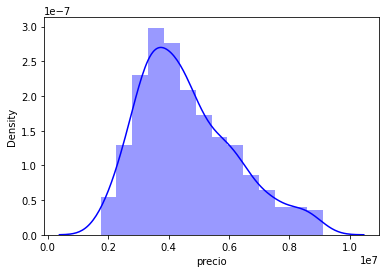

In [18]:
sns.distplot(df['precio'],color="blue")

Mucho mejor!

Nuestra variable dependiente se encuentra en un estado aceptable para introducirla a nuestro análisis de regresión

## La Regresión Lineal en nuestra base de datos

Habíamos dicho previamente que la Regresión era una herramienta estadística que nos permitía explorar la relación entre una variable explicativa y una variable de respuesta. En nuestra base de datos, la variable respuesta que seleccionaremos será el precio del vehículo usado, y las demás variables fungirán como variables para explicar la relación entre ellas y nuestra variable "Y".

Como la variable respuesta es numérica y existe una correlación lineal moderada, podemos iniciar con un análisis gráfico de las variables seleccionadas para luego continuar con el análisis de Regresión Lineal simple en la cual, sólo consideraremos una variable explicativa o "X".

Una adición interesante a este gráfico es una línea de tendencia calculada por Regresión lineal para observar que tanto se ajusta la recta a la nube de puntos.


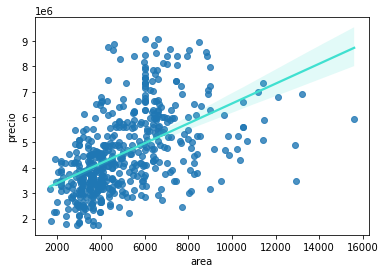

In [19]:
sns.regplot(y='precio', 
            x= 'area',
            data=df, 
            line_kws={'color': 'turquoise'})
plt.show()

Apriori, vemos que la nube de puntos está distribuída no uniformemente a lo largo de la recta de Regresión por lo que antes de obtener los resultados del modelo, y a pesar de que la fuerza de asociación lineal entre las dos variables sea de 54%, la variabilidad expresada por la variable explicativa será menor en términos de R^2 y R^2 ajustado.

Esta medida es de especial interés al obtener resultados en modelos puesto que representa la bondad de ajuste de un modelo. En el contexto de la regresión, esto se traduce a una medida estadística de qué tan bien la línea de regresión se aproxima a los datos reales. Por lo tanto, es importante cuando se usa un modelo estadístico para predecir resultados futuros o en la prueba de hipótesis. Su fórmula se define como:

\begin{align} R^2&=1-\frac{\text{suma de los residuos al cuadrado (SSR)}}{\text{la suma de la distancia de los datos de la media, al cuadrado (SST)}},\\\ R^2&=1-\frac{\sum({y_i}-\hat{y_i})^2}{\sum(y_i-\bar{y})^2}. \end{align}


#### Corramos el modelo de Regresión Lineal

Recordemos que nuestra variable dependiente "Y" será el precio y su valor dependerá de la variable cilindraje, lo cual representado matemáticamente equivaldría a:

$$\hat precio=\underbrace{\hat  \beta_0+\hat  \beta_{1}area}_{modelo}+\underbrace{\epsilon}_{error} $$

In [20]:
regresion = ols("precio~area", data=df)
results = regresion.fit()

In [21]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     185.5
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           2.07e-36
Time:                        07:32:10   Log-Likelihood:                -8241.8
No. Observations:                 530   AIC:                         1.649e+04
Df Residuals:                     528   BIC:                         1.650e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.616e+06   1.57e+05     16.611      0.0

Qué diferencia verdad?

Los resultados del modelo sugieren que el modelo de regresión simple alcanza a explicar únicamente en un 26% la variabilidad de "Y" con nuestra variable "X"

## Verificación de los supuestos de la Regresión Lineal

Dado que contamos con una sola variable explicativa en este modelo de Regresión Lineal, los supuestos a verificar se centrarán en:

- Linealidad en los parámetros
    
- Normalidad en los residuos
    
- Homocedasticidad en los residuos

### 1. Linealidad en los parametros

Para comprobar este supuesto podemos utilizar las primeras gráficas generadas en este script o generar un pairplot que va a realizar el mismo proceso pero de forma más automática.

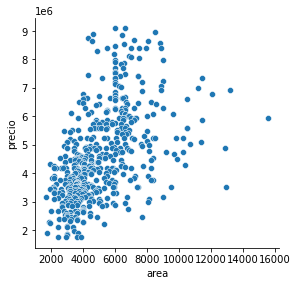

In [22]:
sns.pairplot(x_vars='area', y_vars='precio' , data=df, size=4)

Como la nube de puntos podría caer a lo largo de una línea recta, entonces existe algún tipo de relación lineal entre las dos variables, pero gráficamente no podemos estar seguros si esta suposición se cumpliría.
Pero como ningún parámetro aparece como exponente, ni multiplicado o dividido por otro parámetro, podemos avanzar hacia los otros dos supuestos.


### 2. Normalidad en los residuos

Para la normalidad en los residuos del modelo, compararemos mediantelos gráficos QQ (o gráfico de cuantiles-cuantiles)si los puntos del gráfico forman aproximadamente una línea diagonal recta.

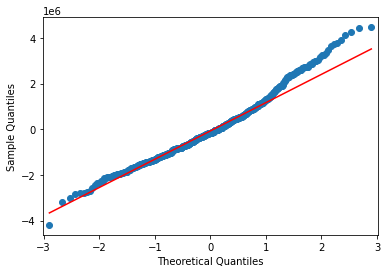

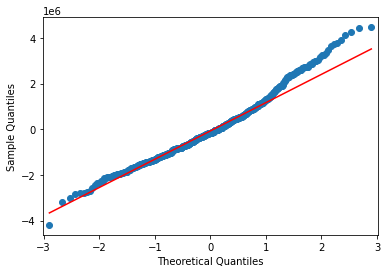

In [23]:
sm.qqplot(results.resid, line='q')

Como podemos ver, las líneas azules que representan a los residuos caen cerca de la línea recta sobretodo en la posición central, pero también existen varios puntos que caen muy por fuera de la línea, por lo que un anális de valores extremos podría ser conveniente.
Si quisiésemos validar la prueba gráfica con la estadística, podríamos recurrir a una de las pruebas detalladas en la secciónde supuestos.
En este caso, aplicaremos la prueba de Jarque-Bera para validar la hipótesis de normalidad en residuos.

Para aplicar una prueba estadística como la de Jarque Bera, recordemos que debemos importar un submódulo de statsmodels que son las estadísticas "stats"

La hipótesis nula de este test es:

- H0: Los datos se distribuyen normalmente
- H1: Los datos no se distribuyen normalmente

In [24]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 32.438910278057804),
 ('Chi^2 two-tail prob.', 9.036081381453262e-08),
 ('Skew', 0.5672610938197274),
 ('Kurtosis', 3.4263697830873903)]

El estadístico de Jarque Bera es grande, lo cual en conjunto con la probabilidad del chi^2 el cual es menor que .05, nos indica que podemos rechazar la hipótesis nula, por lo que tenemos suficiente evidencia para decir que estos datos tienen asimetría y curtosis que es significativamente diferente de una distribución normal.

Recordemos que en el script anterior vimos que de violarse este supuesto tenemos las siguientes opciones:

- Verificar que los valores atípicos no tengan un gran impacto en la distribución. De existir, debemos asegurarnos que sean valores reales y que no sean errores de imputación de datos.

- Otro recurso también es aplicar una transformación no lineal a la variable independiente y / o dependiente.

Finalmemte, podemos contrastar si la media de los residuos de este modelo es 0, o muy cercano a este. Para esto podemos extrar los residuos del modelo y calcular la media directamente:

In [25]:
results.resid.mean()

-3.4230497648131173e-09

La media de los residuos tiende a cero y es muy pequeña por lo que no se estaría violando este supuesto.

### 3. Homocedasticidad en los residuos

Para comprobar este supuesto podemos graficar los valores ajustados frente a una gráfica de residuos. De existir heterocedasticidad, los residuos se dispersarán mucho más a medida que los valores ajustados aumenten creando una imagen de cono.

Aplicando a Python este gráfico se obtendría por medio del comando residplot dentro de seaborn.

In [26]:
y_pred=results.predict()

Text(0.5, 1.0, 'Gráfica de residuos')

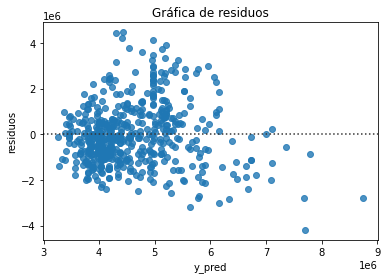

In [27]:
sns.residplot(y_pred, results.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

Interesante! Tenemos la imagen en la cual los residuos tienen una tendencia decreciente y que carecen de varianza constante ya que esta aumenta constantemente con el valor y_pred.

Las opciones que tenemos para mejorar el modelo son:

- En algunas ocasiones, para corregir la heterocedasticidad se puede recurrir a transformaciones logarírmicas en las variables. Una transformación común es simplemente tomar el logaritmo de la variable dependiente, lo que a menudo hace que desaparezca la heterocedasticidad 

- Otra técinica es redefinir a la variable dependiente creando una tasa, así, en lugar de medir la cantidad de una variable podemos estimar la cantidad de bienes por persona o por otro criterio



Probemos una trasnformación logarítmica a la variable dependiente para ver cómo cambiaría la relación entre las variables:

### El modelo de regresión log-lin

Una de las ventajas de aplicar logaritmos sobre Y, es su habilidad para acotar el rango de la variable en una cantidad más pequeña que la original. Este efecto generalmente reduce la sensibilidad de las estimaciones a las observaciones extremas o atípicas, tanto de las variables independientes como las dependientes, por lo que en este caso y al violar 2 de 3 supuestos podría ser de bastante ayuda. 



Existen así mismo varias modificaciones al modelo estándar de Regresión Lineal dependiendo de dónde la transformación logarítmica se aplique. En esta línea, tenemos a continuación de un resumen de la familia de los modelos logarítmicos y cómo cambiaría su interpretación dependiendo de la forma de β1

![image-4.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/Regresi%C3%B3n%20Linear%20simple%20aplicada/types_linear_models.png)

_Fuente: KDnuggets: Learn Generalized Linear Models (GLM) using R_

Antes de aplicar logaritmos a nuestra variable dependiente repliquemos el análisis de datos extremos realizado a la variable dependiente "Y"

Como ejemplo de la tabla, y siguiendo las recomendaciones de los supuestos violados, probemos aplicando logaritmos a nuestra variable dependiente precio con la ayuda del module numpy.

In [28]:
log_precio=np.log(df.precio)

Ahora, adicionemos esta columna a nuestro dataframe para fácil acceso dentro del análisis:

In [29]:
df['log_precio']=log_precio

Listo,  procedamos a replicar el gráfico con la función regplot del module seaborn con una línea de tendencia calculada por Regresión lineal para observar que tanto se ajusta la recta a la nueva nube de puntos.


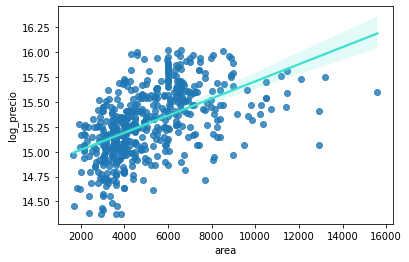

In [30]:
sns.regplot(y='log_precio',
            x= 'area',
            data=df, 
            line_kws={'color': 'turquoise'})
plt.show()

Cuando se aplica la transformación logarítmica a las variables en un modelo de regresión lineal, los coeficientes estimados del modelo cambiarán, pero el valor de R-cuadrado permanecerá sin cambios.

La razón de esto es que la transformación logarítmica afecta a los valores de las variables, pero no a la relación lineal entre las variables. Por lo tanto, la relación entre las variables sigue siendo la misma después de la transformación logarítmica.

Por otro lado, los coeficientes estimados cambiarán después de aplicar la transformación logarítmica debido a la naturaleza logarítmica de la transformación. En particular, la transformación logarítmica puede "aplanar" la relación entre las variables, lo que significa que la relación puede parecer más lineal en una escala logarítmica que en una escala lineal.

Corramos el nuevo modelo:

In [31]:
regresion_2 = ols("log_precio ~ area", data=df)
results_2 = regresion_2.fit()

In [32]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           2.90e-37
Time:                        07:32:10   Log-Likelihood:                -108.37
No. Observations:                 530   AIC:                             220.7
Df Residuals:                     528   BIC:                             229.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8469      0.034    435.636      0.0

## Verificación de los supuestos de la Regresión Lineal

### 1. Linealidad en los parametros

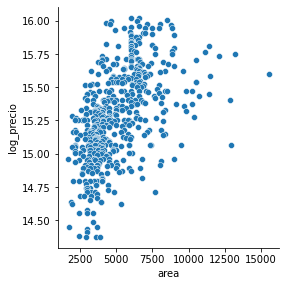

In [33]:
sns.pairplot(x_vars='area', y_vars='log_precio' , data=df, size=4)

### 2. Normalidad en los residuos

Para la normalidad en los residuos del modelo, compararemos mediantelos gráficos QQ (o gráfico de cuantiles-cuantiles)si los puntos del gráfico forman aproximadamente una línea diagonal recta.

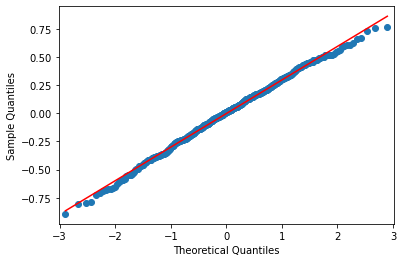

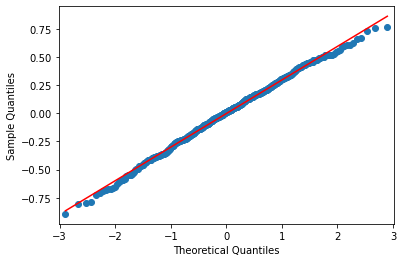

In [34]:
sm.qqplot(results_2.resid, line='q')

Qué diferencia!

Como podemos ver, las líneas azules que representan a los residuos caen cerca de la línea recta sobretodo en la posición central, 
Si quisiésemos validar la prueba gráfica con la estadística, podríamos recurrir a una de las pruebas detalladas en la secciónde supuestos.
En este caso, aplicaremos la prueba de Jarque-Bera para validar la hipótesis de normalidad en residuos.

Para aplicar una prueba estadística como la de Jarque Bera, recordemos que debemos importar un submódulo de statsmodels que son las estadísticas "stats"

La hipótesis nula de este test es:

- H0: Los datos se distribuyen normalmente
- H1: Los datos no se distribuyen normalmente

In [35]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results_2.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 3.034562183387434),
 ('Chi^2 two-tail prob.', 0.21930735366119203),
 ('Skew', -0.16325448998935957),
 ('Kurtosis', 2.8244835546181504)]

El estadístico de Jarque Bera disminuyó su tamaño lo cual es una my buena señal. Además, la probabilidad del chi^2 el cual es mayor que .05, por lo que no podemos rechazar la hipótesis nula, y se concluye que no tenemos suficiente evidencia para decir que estos datos tienen asimetría y curtosis que es significativamente diferente de una distribución normal.

Finalmemte, podemos contrastar si la media de los residuos de este modelo es 0, o muy cercano a este. Para esto podemos extrar los residuos del modelo y calcular la media directamente:

In [36]:
results.resid.mean()

-3.4230497648131173e-09

La media de los residuos tiende a cero y es muy pequeña por lo que no se estaría violando este supuesto.

### 3. Homocedasticidad en los residuos

Para comprobar este supuesto podemos graficar los valores ajustados frente a una gráfica de residuos. De existir heterocedasticidad, los residuos se dispersarán mucho más a medida que los valores ajustados aumenten creando una imagen de cono.

Aplicando a Python este gráfico se obtendría por medio del comando residplot dentro de seaborn.

In [37]:
y_pred2=results_2.predict()

Text(0.5, 1.0, 'Gráfica de residuos')

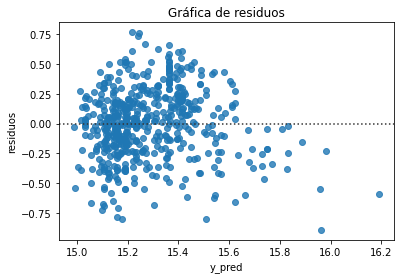

In [38]:
sns.residplot(y_pred2, results_2.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

Interesante! Aunque corregimos el problema de normalidad en los residuos vemos que aún tenemos problemas para pasar el supuesto de heterocedasticidad. Las opciones que nos quedan son:
- Redefinir a la variable dependiente creando una tasa
- Aplicar el tratamiento de valores extremos a la variable independiente

Comencemos con el tratamiento de valores extremos a la varaible dependiente ya que la gráfica de normalidad se ajustó muchísimo, pero aún se pueden ver algunos puntos qe caen fuera de la línea del Q-Q plot.

<AxesSubplot:xlabel='area', ylabel='Density'>

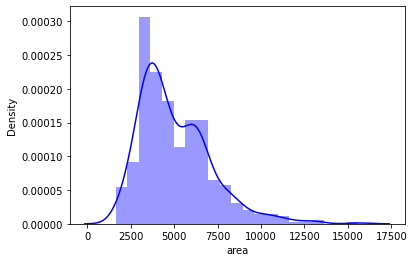

In [39]:
sns.distplot(df['area'],color="blue")

Del gráfico podríamos intuir que la distribución se trata de una distribución bimodal, por lo que retirar valores extremos no va a cambiar su distribución, pero sí puede ajustar los resultados de la regresión.

In [40]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1_area = df.area.quantile(0.25)
Q3_area = df.area.quantile(0.75)
IQR_area = Q3_area - Q1_area  #rango intercuartil
print(IQR_area)

2768.25


In [41]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['area'] < (Q1_area - 1.5 * IQR_area)) |(df['area'] > (Q3_area + 1.5 * IQR_area)))]
df.shape

(517, 14)

<AxesSubplot:xlabel='area', ylabel='Density'>

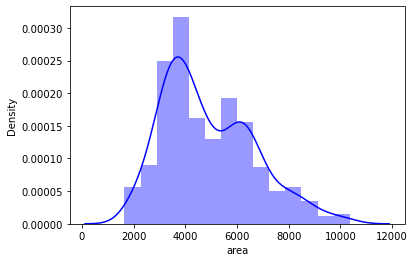

In [42]:
sns.distplot(df['area'],color="blue")

In [43]:
regresion_3 = ols("log_precio ~ area", data=df)
results_3 = regresion_3.fit()

In [44]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     208.0
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           7.62e-40
Time:                        07:32:13   Log-Likelihood:                -97.736
No. Observations:                 517   AIC:                             199.5
Df Residuals:                     515   BIC:                             208.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.7643      0.038    391.549      0.0

Los resultados del modelo sugieren que el modelo de regresión simple alcanza a explicar ahora 30% la variabilidad de "Y" con nuestra variable "X", lo cual ya es considerable. Recuerden que estamos explicando la variabilidad de "Y" en función de una sola variable por lo que la variabilidad explicada siempre será menor que cuando incluyamos más variables.

Listo!, verifiquemos si con este procedimiento logramos tener algún impacto en la heterocedasticidad de los residuos de nuestro modelo de regresión 2.

In [45]:
y_pred3=results_3.predict()

Text(0.5, 1.0, 'Gráfica de residuos')

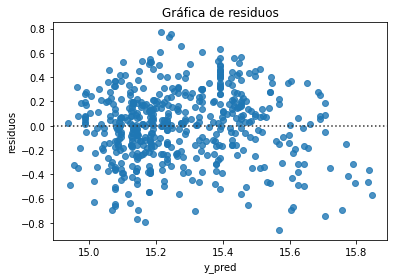

In [46]:
sns.residplot(y_pred3, results_3.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

Perfecto! 
De la gráfica de residuos anterior, podríamos inferir que los residuos no formaron ningún patrón fuerte (aunque seguimos viendo ese decremento en las y predichas pero es mucho menos evidente que en los residuos de los modelos 1 y 2).

Adicionalmente, los residuos tienden a tener varianza constante, ya que esta no parece aumentar/disminuir constantemente con el valor y_pred.

_Nota No.1: Es posible que al aplicar la prueba estadística, la probabilidad sea inferior a 0.05 y no se pueda aceptar la hipótesis nula, se podría relajar el supuesto si para uno de los niveles de significancia la prueba estadística pasa, de interesarles apliquen la prueba y coméntenme en la sesión sincrónica qué descubrieron_

### Importante

Debido a que los resultados del modelo 3 corresponden a uno típicamente log-lin, hay que tener cuidado en la interpretación de los resultados porque la relación entre los estimadores ha cambiado. Es así que si seguimos la tabla incluída previamente en este script, podemos interpretar los resultados del modelo de la siguiente forma:

El modelo Log-Nivel se conoce también como la semielasticidad de "Y" respecto a "X", y se interpreta como un incremento de 1 unidad en "X" o en el área del inmueble, se asocia a un cambio en "Y" de (100·β1 )%, ( 0.1%)